In [1]:
include("ErgodicControl.jl")
using .ErgodicControl

In [2]:
PointsBoundary([])

PointsBoundary(Tuple{Float64, Float64}[])

In [3]:
em = ErgodicManagerR2("single gaussian", K=5, bins=100)

# x0 = [0.4,0.1]
x0 = [0.2,0.2]
N = 40
h = 0.1

0.1

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/B5j7d/src/backends.jl:43


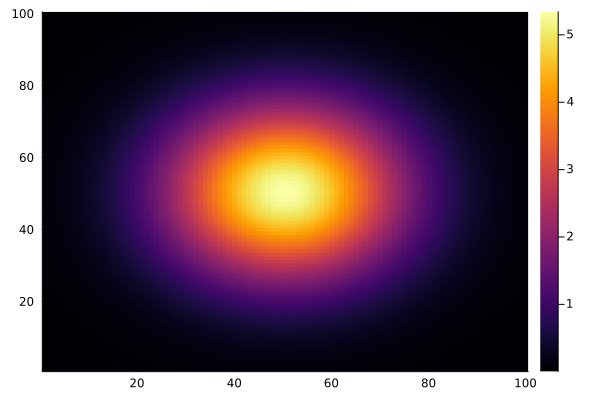

In [4]:
using Plots
heatmap(em.phi)

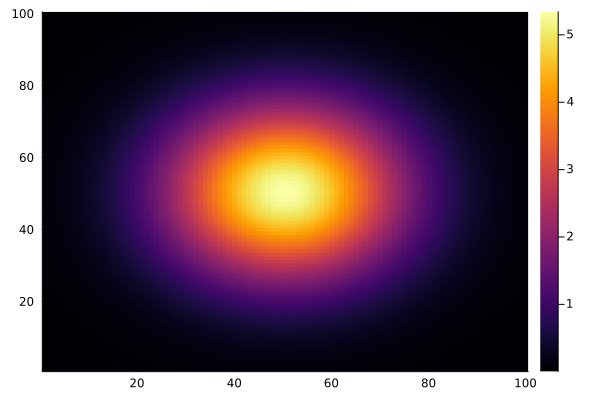

In [5]:
# phi = zeros(size(em.phi))
# phi[60:65,60:65] .= 50.0

x0 = [0.44,0.33]


points = [(x0[1] - 0.3, x0[2] - 0.3), (x0[1] - 0.3, x0[2]), (x0[1], x0[2]), (x0[1], x0[2]-0.3), (x0[1] - 0.3, x0[2] - 0.3)]
points = interpolate_points(points, 10)
xy_points_boundary = PointsBoundary(points)
em = ErgodicManagerR2(em.domain, em.phi, 25, xy_points_boundary)

heatmap(em.phi)

In [6]:
N = 20
x0 = [0.44,0.33]
tm = TrajectoryManager(x0, h, N, ConstantInitializer([0.0,0.0]))
tm.barrier_cost = 0#1000.

xd, ud, es = pto_trajectory(em, tm, return_score=true)

--------------------------------------------------------------------------
 iter  |ergodic score |control score |total score |direc deriv |step size
--------------------------------------------------------------------------
 1       0.2395816      0.0003108      0.2398924    -0.1288913   5.00000
 2       0.1542581      0.0004810      0.1547391    -0.0282252   5.00000
 3       0.1340959      0.0005025      0.1345984    -0.0058148   5.00000
 4       0.1233236      0.0006851      0.1240087    -0.0015837   10.00000
 5       0.1191397      0.0007299      0.1198696    -0.0005123   10.00000
 6       0.1155694      0.0008325      0.1164019    -0.0004649   10.00000
 7       0.1124784      0.0008750      0.1133534    -0.0004662   10.00000
 8       0.1097960      0.0010061      0.1108021    -0.0004822   10.00000
 9       0.1079619      0.0010216      0.1089835    -0.0005206   5.00000
 10      0.1057302      0.0011147      0.1068449    -0.0002249   10.00000
 11      0.1037764      0.0011962      0

([[0.44, 0.33], [0.38108300252930377, 0.28886179813437296], [0.44141404584255023, 0.23482621327081335], [0.545969966594618, 0.2668534601142648], [0.6148151197040397, 0.3292056842222817], [0.663642436811256, 0.3860501524073582], [0.709436000505702, 0.44429538734146357], [0.7383595406702904, 0.5194229503457146], [0.7156230751788025, 0.5957458236124655], [0.63869507121283, 0.6176065793447467]  …  [0.51644413229069, 0.5305964419097557], [0.47014016440719714, 0.4869794143677133], [0.399133796553351, 0.4583511607676181], [0.3072183346775947, 0.4521959450778131], [0.25349346070066486, 0.5113534368450654], [0.28181604541657057, 0.5878840038911031], [0.35265111632331364, 0.6391145677460113], [0.4262001085993212, 0.6834952586255089], [0.4958322538460067, 0.7418474894397215], [0.5489579435826601, 0.8040857248153591]], [[-0.5891699747069624, -0.4113820186562708], [0.6033104331324646, -0.5403558486355962], [1.045559207520678, 0.3202724684345148], [0.6884515310942159, 0.6235222410801691], [0.4882731

In [7]:
es

0.013556827710738949

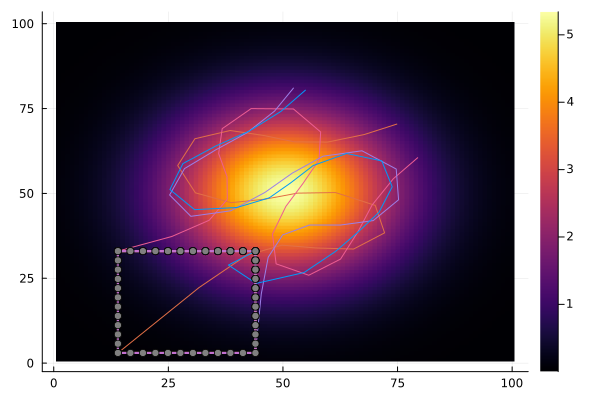

In [58]:
plot!([xd[i][1]*100 for i =1:length(xd)], [xd[i][2]*100 for i =1:length(xd)])
plot!([xd[1][1]*100], [xd[1][2]*100], color=:green)
scatter!([xd[1][1]*100], [xd[1][2]*100])
plot!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2)
scatter!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2, color=:gray, legend=false)



In [72]:
em = ErgodicManagerR2(em.domain, phi, 5)
xd_smc, ud_smc = smc_trajectory(em, tm; verbose=true, umax=1.0)

([[0.53, 0.5], [0.43000000000000005, 0.5000000000000001], [0.33000000000000007, 0.5000000000000002], [0.23000000000000007, 0.5000000000000002], [0.13000000000000006, 0.5000000000000002], [0.030000000000000054, 0.5000000000000001], [0.13000000000000006, 0.4999999999999994], [0.23000000000000007, 0.49999999999999784], [0.33000000000000007, 0.4999999999999951], [0.43000000000000005, 0.4999999999999913]  …  [2.5252771739045956, 0.7358213295319177], [2.564184005536913, 0.8279422199549618], [2.6128989524210215, 0.9152740809798963], [2.7015159945449625, 0.9616100264780049], [2.8014458273761087, 0.957864561174583], [2.898587247840667, 0.9341254704142388], [2.9631841066750524, 0.8577890713065359], [2.9542775045634433, 0.7581864988556927], [2.910004814605242, 0.668520848108793], [2.8406804971716126, 0.5964504726944704]], [[-1.0, 7.435098295962948e-16], [-1.0, 1.4235539011556096e-15], [-1.0, 4.636608127621785e-16], [-1.0, -4.220624201228706e-16], [-1.0, -1.581710038384762e-15], [1.0, -7.299936268

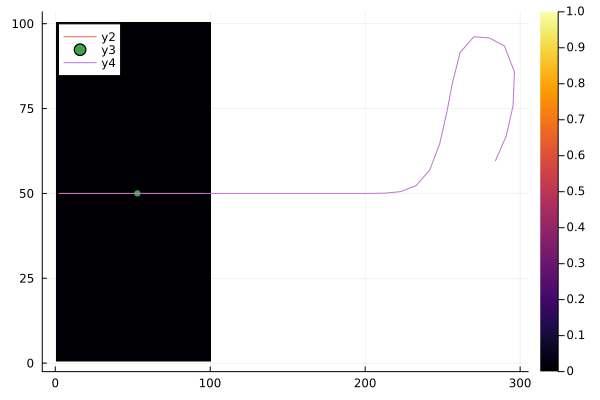

In [73]:
plot!([xd_smc[i][1]*100 for i =1:length(xd)], [xd_smc[i][2]*100 for i =1:length(xd)])
